In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

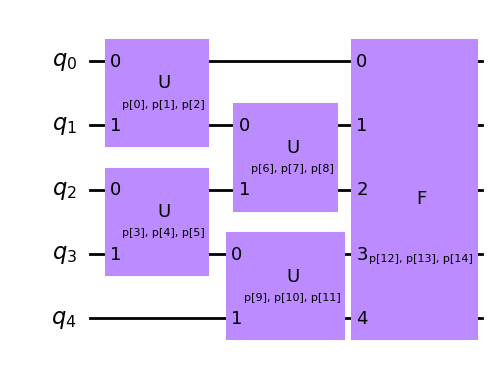

In [2]:
qcnn_without_qubits = qcnn_feature_map()

z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(2)
#convolution_gate.h(0)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],1,0)
convolution_gate.crz(z[2],0,1)
qcnn_without_qubits.convolution(convolution_gate, var_param=True,entangled=True,closed=True) 

y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
#qcnn_without_qubits.pooling(pooling_gate,var_param=False)
#qcnn_without_qubits.pooling(pooling_gate,var_param=False)

#print(qcnn_without_qubits.get_qubits_left()) should raise an error.

x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(5)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,1)
fully_gate.crx(x[1],1,3)
qcnn_without_qubits.fully_connected(fully_gate)


qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()

p, ['p[0]', 'p[1]', 'p[2]', 'p[3]', 'p[4]', 'p[5]', 'p[6]', 'p[7]']


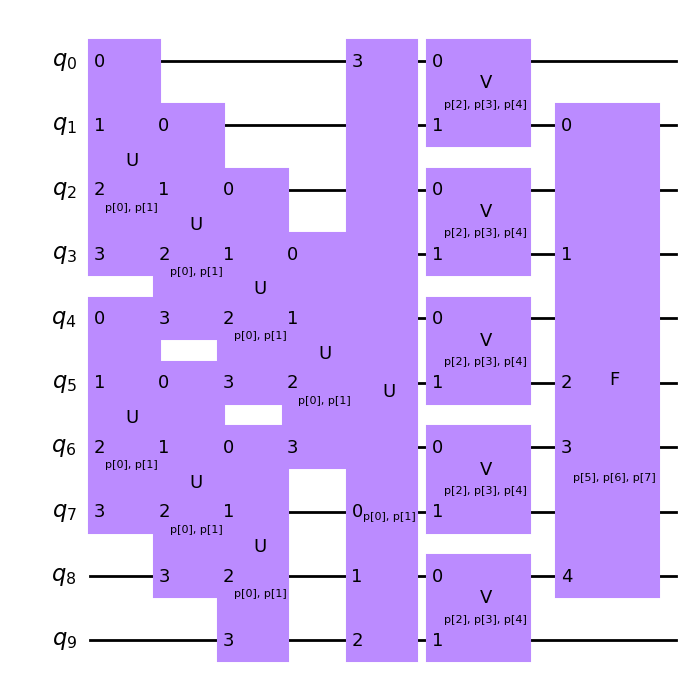

In [3]:
# Tests ohne Vorgabe der Anzahl der Qubits:

qcnn_without_qubits = qcnn_feature_map()


z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(4)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],2,0)
qcnn_without_qubits.convolution(convolution_gate, var_param=False,entangled=True,closed=True)


y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
qcnn_without_qubits.pooling(pooling_gate,var_param=False) #TODO: var_param funktioniert noch nicht
#qcnn_without_qubits.pooling(pooling_gate,var_param=False)



x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(5)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,2)
qcnn_without_qubits.fully_connected(fully_gate)

qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
print(qcnn_param_vec)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()

None
{'num_qubits': 6}


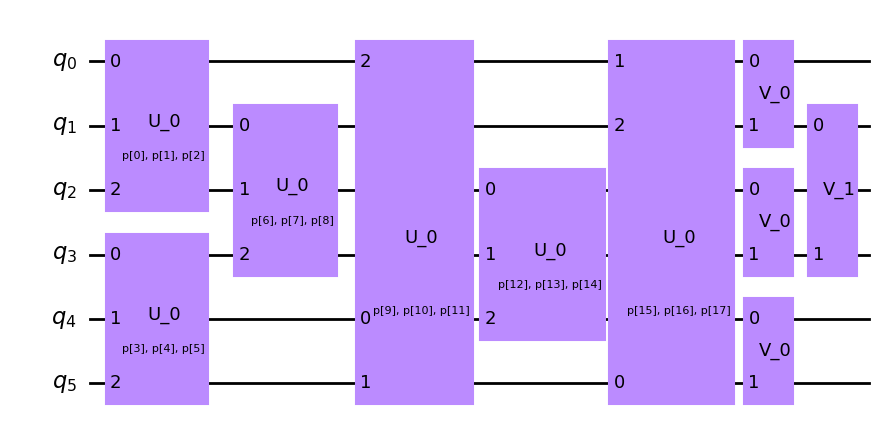

In [4]:
# Test mit Vorgabe der Qubits
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np


qcnn_with_qubits = qcnn_feature_map(6)

x = ParameterVector("x",3)
convolution_gate = QuantumCircuit(3)
convolution_gate.crx(x[0],0,1)
convolution_gate.crx(x[1],0,2)
convolution_gate.crx(x[2],2,0)
qcnn_with_qubits.convolution(convolution_gate,var_param=True,entangled=True,closed=True)


pooling_gate = QuantumCircuit(2)
pooling_gate.cx(0,1)
qcnn_with_qubits.pooling(pooling_gate)

qcnn_with_qubits.pooling(pooling_gate)



print(qcnn_with_qubits.set_params(num_qubits = 6))
print(qcnn_with_qubits.get_params())

param_vec = ParameterVector("p",qcnn_with_qubits.num_parameters)
qcnn_with_qubits.get_circuit([],param_vec).draw()





[4, 10, 10]
4


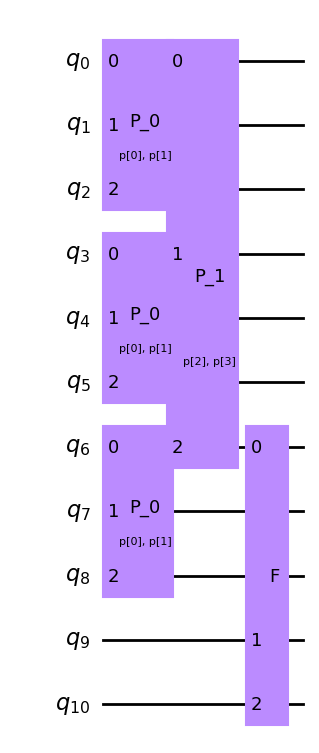

In [5]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

qcnn_train = qcnn_feature_map(11)

x = ParameterVector("x", 3)
gate_qc = QuantumCircuit(3)
gate_qc.crx(x[0],0,1)
gate_qc.crx(x[2],0,2)
gate_qc.crx(x[1],1,2)

y = ParameterVector("y", 2)
gate_conv2 = QuantumCircuit(2)
gate_conv2.crz(y[0],0,1)
gate_conv2.crz(y[1],1,0)

z = ParameterVector("z", 3)
pooling_gate1 = QuantumCircuit(3)
pooling_gate1.rx(z[0],0)
pooling_gate1.rx(z[1],1)

pooling_gate1.cx(0,1)

# Fully für 2 Qubits
#Alt:
# a = ParameterVector("a",2)
# fully_gate = QuantumCircuit(2)
# fully_gate.rx(a[0],0)
# fully_gate.rx(a[1],1)
a = ParameterVector("a",2)
fully_gate = QuantumCircuit(2)
fully_gate.crx(a[0],0,1)
fully_gate.crx(a[1],1,0)

#Fully für 3 Qubits
b = ParameterVector("b",3)
fully_gate2 = QuantumCircuit(3)
fully_gate2.rx(b[0],0)
fully_gate2.rx(b[1],2)
fully_gate2.rx(b[2],1)

fully_gate_without_param = QuantumCircuit(2)

fully_gate_without_param2 = QuantumCircuit(3)


# qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = False)
#qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

qcnn_train.pooling(pooling_gate1,operator="P", var_param=False,target_qubit=0)
qcnn_train.pooling(pooling_gate1,operator="P", var_param=False,target_qubit=2)

print(qcnn_train.get_qubits_left())

#qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = False)
#qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

#qcnn_train.pooling(pooling_gate1,operator="P")
#qcnn_train.pooling(pooling_gate1,operator="P")
qcnn_train.fully_connected(fully_gate_without_param2) # TODO: Probleme mit fullygate
#print(qcnn_train.get_qubits_left())
param_vec_for_qcnn = ParameterVector("p", qcnn_train.num_parameters)
print(qcnn_train.num_parameters)
qcnn_train.get_circuit([],param_vec_for_qcnn).draw()

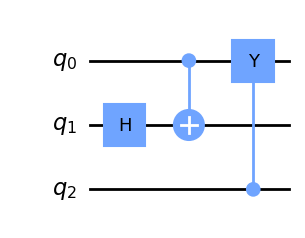

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

circuit_right_side = QuantumCircuit(3)
circuit_right_side.h(1)
circuit_right_side.cx(0,1)
circuit_right_side.cy(2,0)

circuit_right_side.draw()

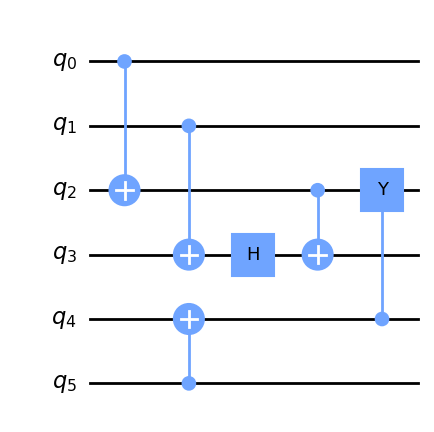

In [7]:
circuit_left_side = QuantumCircuit(6)
circuit_left_side.cx(0,2)
circuit_left_side.cx(1,3)
circuit_left_side.cx(5,4)

QC = circuit_left_side.compose(circuit_right_side,[2,3,4])
QC.draw()